In [105]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
metric_dir = "/home/local/VANDERBILT/litz/data/luna16/metrics"
johof_folds = glob.glob(os.path.join(metric_dir, "johof_norm*"))
lsm_folds = glob.glob(os.path.join(metric_dir, "lsm_*"))

In [113]:
johof_df = pd.read_csv(johof_folds[0])
for i, johof_fold in enumerate(johof_folds):
    if i > 0:
        johof_fold_df = pd.read_csv(johof_fold)
        johof_df = pd.concat([johof_df, johof_fold_df], ignore_index=True)
johof_df.drop(columns=['Unnamed: 0'], inplace=True)

lsm_df = pd.read_csv(lsm_folds[0])
for i, lsm_fold in enumerate(lsm_folds):
    if i > 0:
        lsm_fold_df = pd.read_csv(lsm_fold)
        lsm_df = pd.concat([lsm_df, lsm_fold_df], ignore_index=True)
lsm_df.drop(columns=['Unnamed: 0'], inplace=True)
print(len(johof_df))
print(len(lsm_df))

47
47


In [134]:
# function that maps an input int (as str type) to name of lobe
def lobe_map(x):
    if x=='0': return 'LUL'
    if x=='1': return 'LLL'
    if x=='2': return 'RUL'
    if x=='3': return 'RML'
    if x=='4': return 'RLL'

In [135]:
johof_df['id'] = pd.Series(range(0, len(johof_df)))
lsm_df['id'] = pd.Series(range(0, len(lsm_df)))
# convert wide to long form
johof_long = pd.melt(johof_df, id_vars=['id'], value_vars=['0', '1', '2', '3', '4'])
johof_long['model'] = 'Hofmanninger (2D Unet)'
lsm_long = pd.melt(lsm_df, id_vars=['id'], value_vars=['0', '1', '2', '3', '4'])
lsm_long['model'] = 'LSM'
all_df = pd.concat([johof_long, lsm_long], ignore_index=True)
# convert lobe numbers to names
all_df = all_df.rename(columns={'variable':'Lobe', 'value': 'Dice score'})
all_df['Lobe'] = all_df['Lobe'].apply(lobe_map)

In [136]:
all_df


,id,Lobe,Dice score,model
0,0,LUL,0.903191,Hofmanninger (2D Unet)
1,1,LUL,0.918089,Hofmanninger (2D Unet)
2,2,LUL,0.917408,Hofmanninger (2D Unet)
3,3,LUL,0.923730,Hofmanninger (2D Unet)
4,4,LUL,0.959741,Hofmanninger (2D Unet)
...,...,...,...,...
465,42,RLL,0.939751,LSM
466,43,RLL,0.951192,LSM
467,44,RLL,0.950739,LSM
468,45,RLL,0.968078,LSM


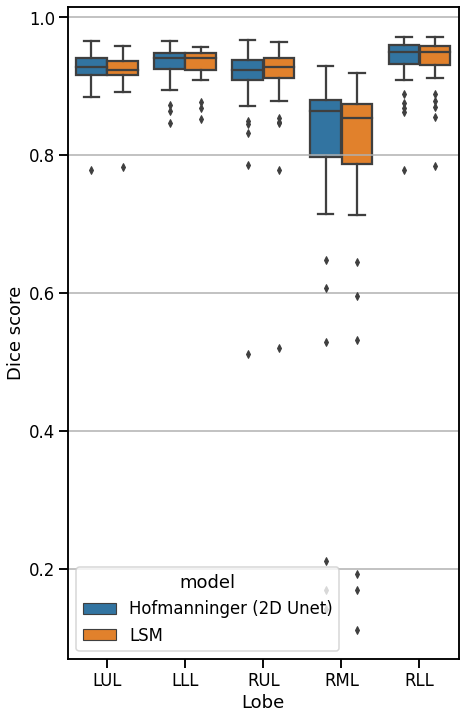

In [137]:
sns.set_context(context="talk")
f, ax = plt.subplots(figsize=(7,12))
sns.boxplot(x="Lobe", y="Dice score", hue="model", data=all_df)
ax.yaxis.grid(True)

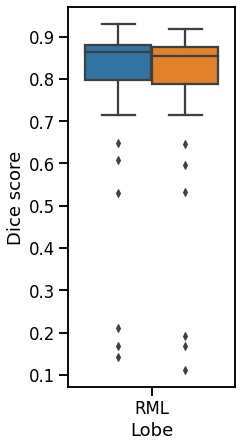

In [140]:
f, ax = plt.subplots(figsize=(3,7))
b = sns.boxplot(x="Lobe", y="Dice score", data=all_df[all_df["Lobe"]=='RML'], hue="model", orient="v")
ax.get_legend().remove()

### Analysis
On average, the RML is segmented worse with Johof and LSM. There are 6 cases where the RML segmentation score falls well below the 1st quartile of 0.78 dice score.

In [14]:
metrics_df = pd.read_csv(metrics_path)
metrics_df = metrics_df.iloc[:, 1:]
a = metrics_df.mean(axis=0)
print(a)
print(a.mean())

0    0.971272
1    0.974861
2    0.958679
3    0.935657
4    0.975020
dtype: float64
0.9630977770285714


In [ ]:
emp_path = ""
emp_df = pd.read_csv(emp_path)